In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# x1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
# y1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rainfall Cluster Number 1901-2010.csv",index_col=0)
# x2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
# y2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rainfall Cluster Number 2011-2022.csv",index_col=0)

In [4]:
# x=pd.concat([x1,x2])
# x=x.set_index(i for i in range(122))
# y=pd.concat([y1,y2])
# y=y.set_index(i for i in range(122))


In [26]:
# x_train=x[:117]
# y_train=y[:117]
# x_test=x[117:]
# y_test=y[117:]

# print("X train shape : ",x_train.shape)
# print("Y train shape : ",y_train.shape)
# print("X test shape : ",x_test.shape)
# print("Y test shape : ",y_test.shape)

In [5]:
x=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SSTA Category 1901-2022.csv",index_col=0)
y=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\Rainfall Clusters 1901-2022.csv",index_col=0)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)

In [27]:
from sklearn import svm

# model = svm.SVC( gamma='auto', C=1,kernel='rbf', probability=True,degree=2)
model = svm.SVC()
model.fit(x_train,y_train)

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
y_pred = model.predict(x_test)
y_pred

array([3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [29]:
y_array=y_test.values.ravel()
y_array

array([3, 3, 0, 3, 5, 3, 1], dtype=int64)

In [30]:
accuracy_score(y_pred,y_array)

0.5714285714285714

In [17]:
clusters=[]
for i in range(1,10):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\IMD Rainfall Clusters Images\Cluster {i}.png"))
    

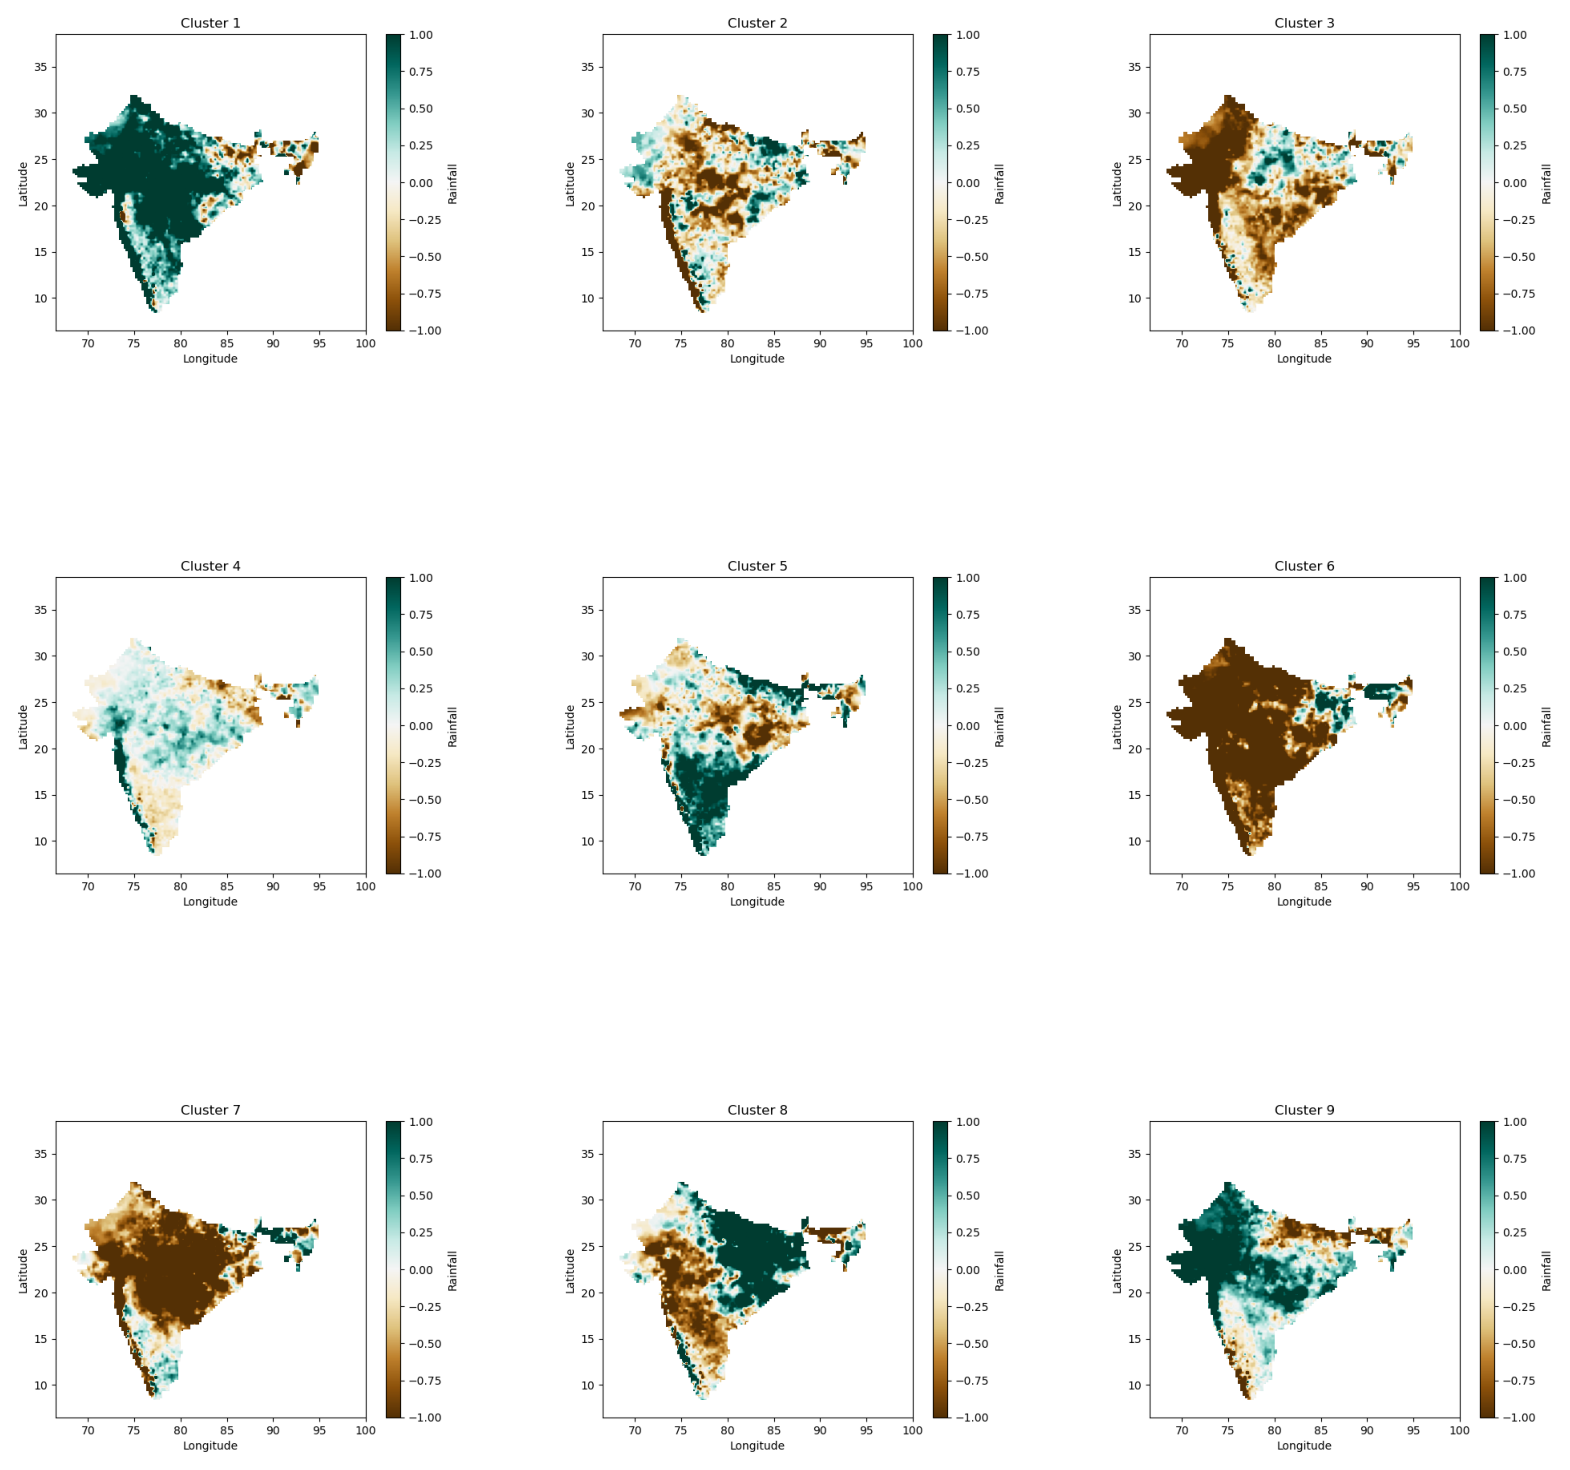

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [20]:
indexes_list = y_test.index.tolist()
indexes_list

[18, 45, 47, 89, 4, 40, 62]

In [21]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{i+1901} Rainfall.png"))
                        

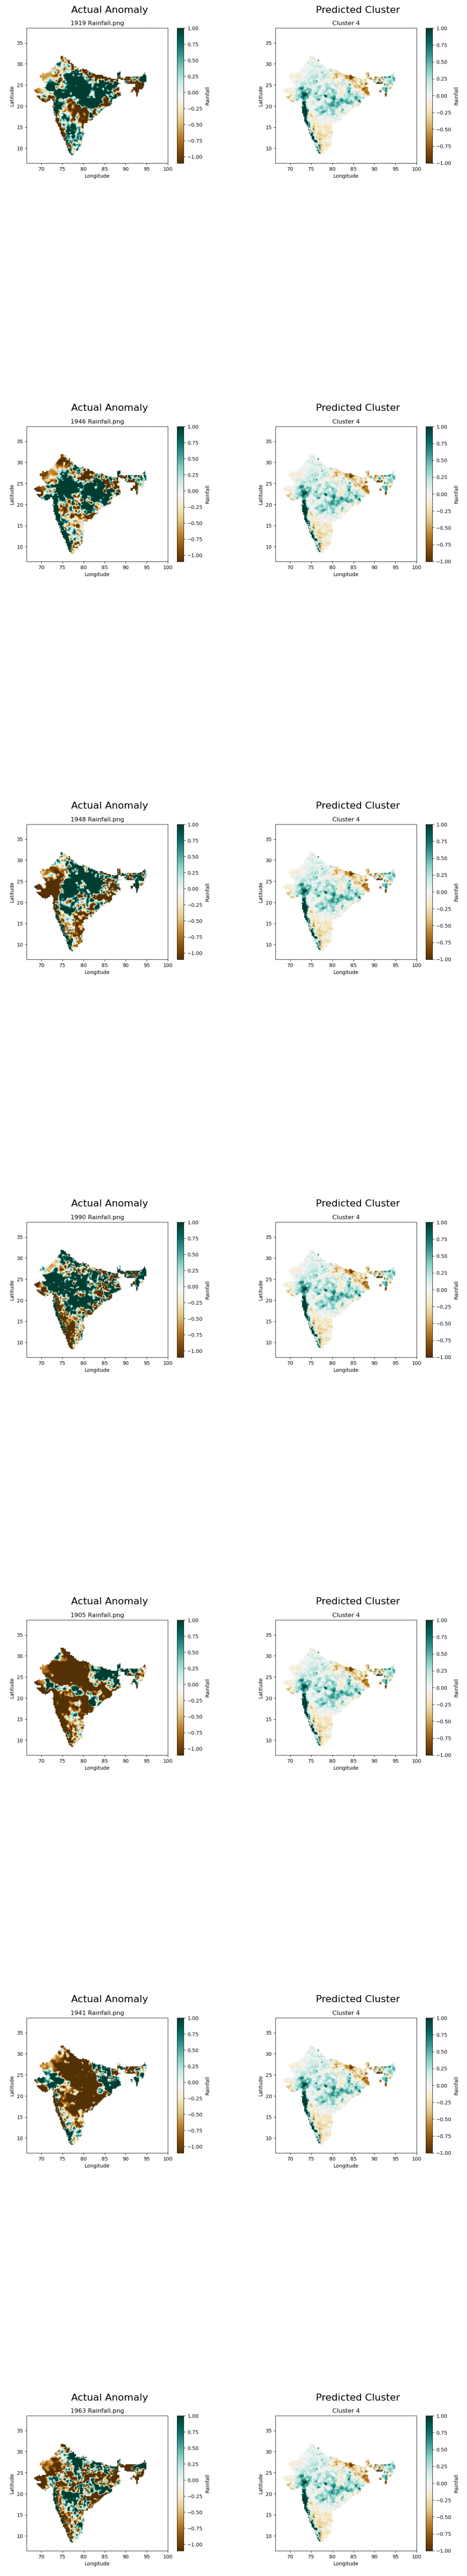

In [23]:
fig, axes = plt.subplots(7, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


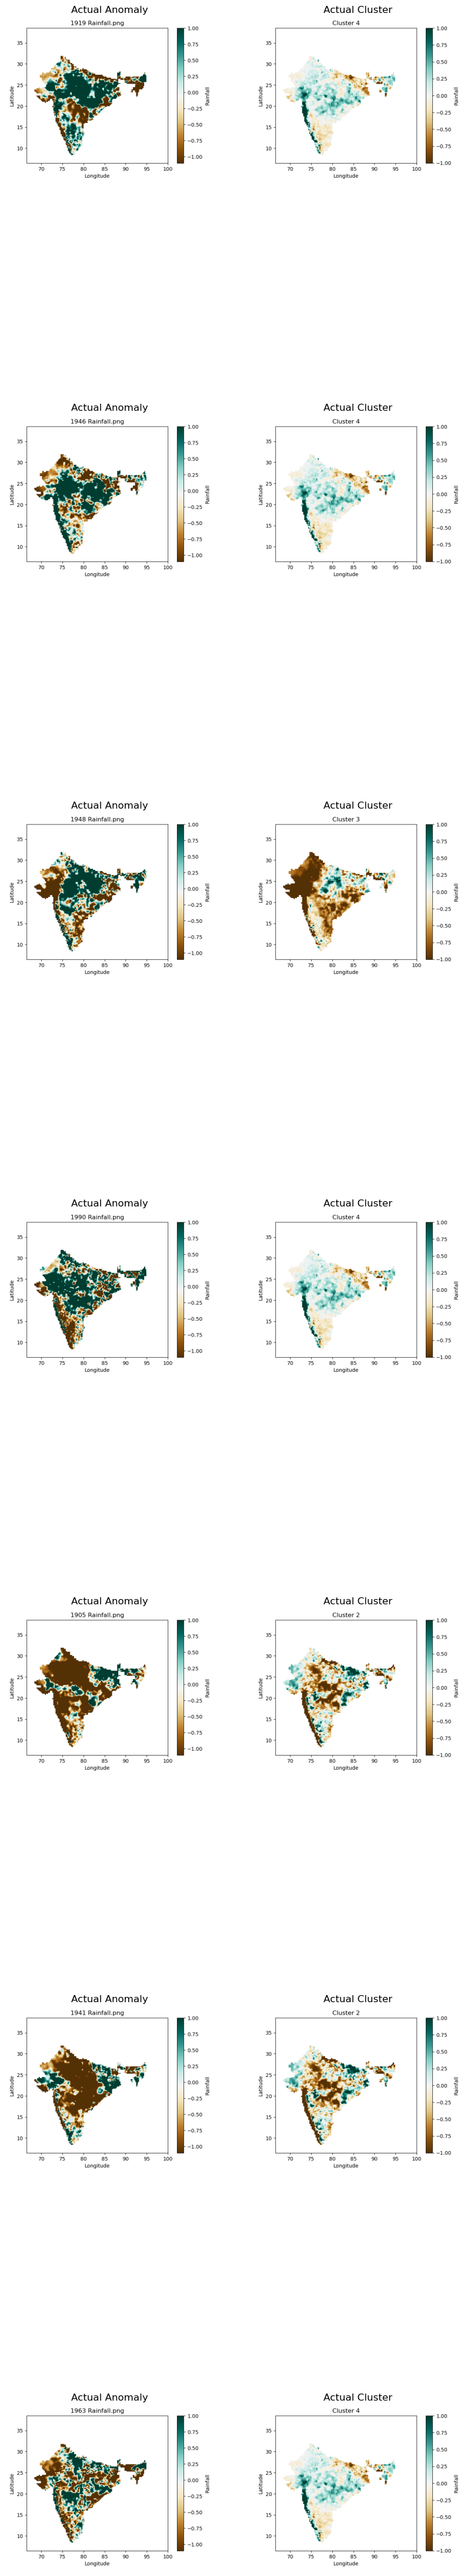

In [56]:
#Actual Years
fig, axes = plt.subplots(7, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

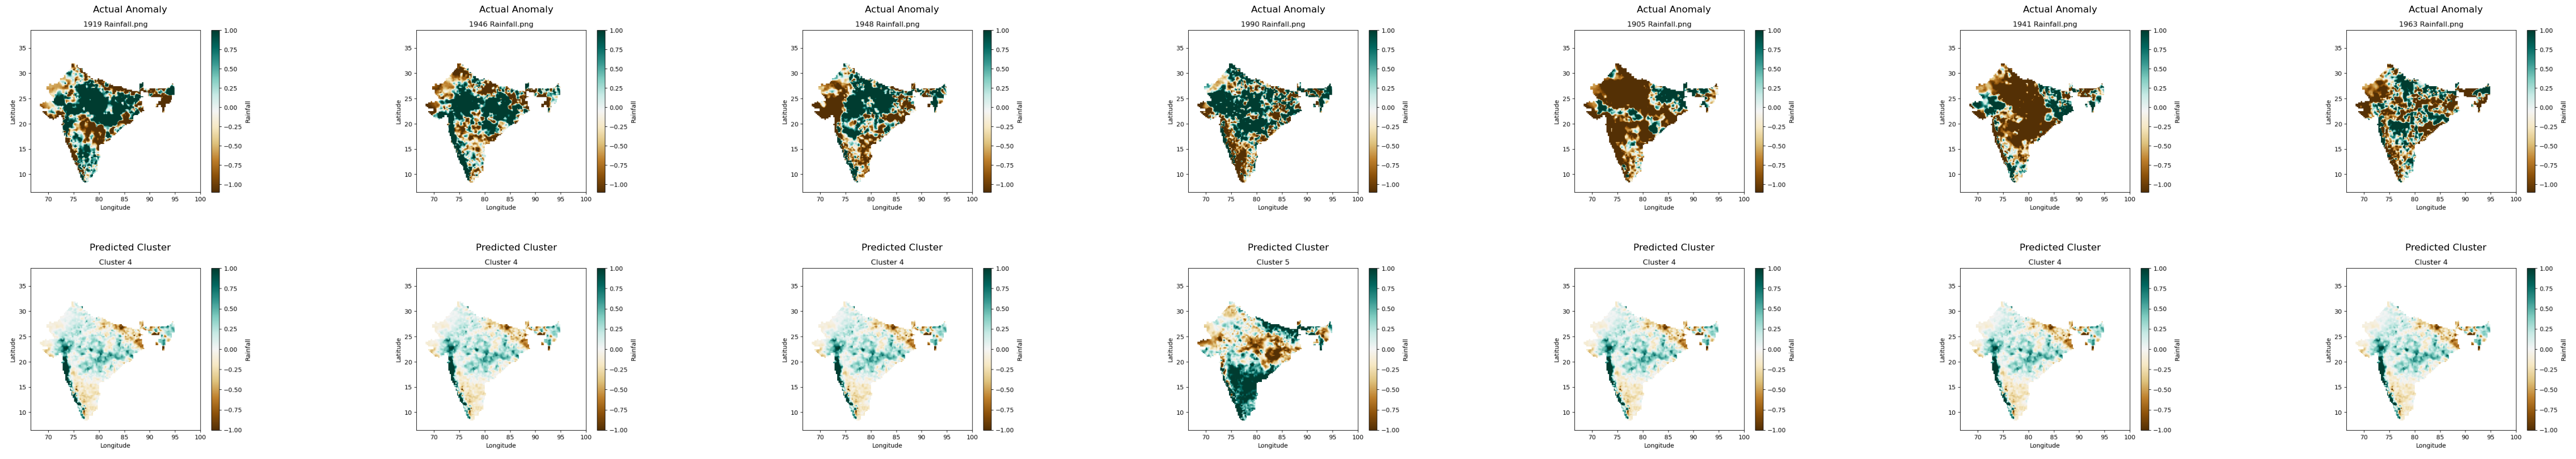

In [59]:
fig, axes = plt.subplots(2, 7, figsize=(60, 10)) 
j=0
k=0
for i, ax in enumerate(axes.ravel()):
    
    if(i>=7):
        pred_clus=y_pred[k]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        k+=1
    else:
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')
        j+=1

plt.savefig('Train Test Split - Prediction.png')
